# Explore here

In [34]:
# Your code here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

from pickle import dump

import warnings

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
total_data.info() #9 variables (columnas) y 768 observaciones. Todas las variables son numéricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
total_data.isnull().sum() #No tiene datos nulos el dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

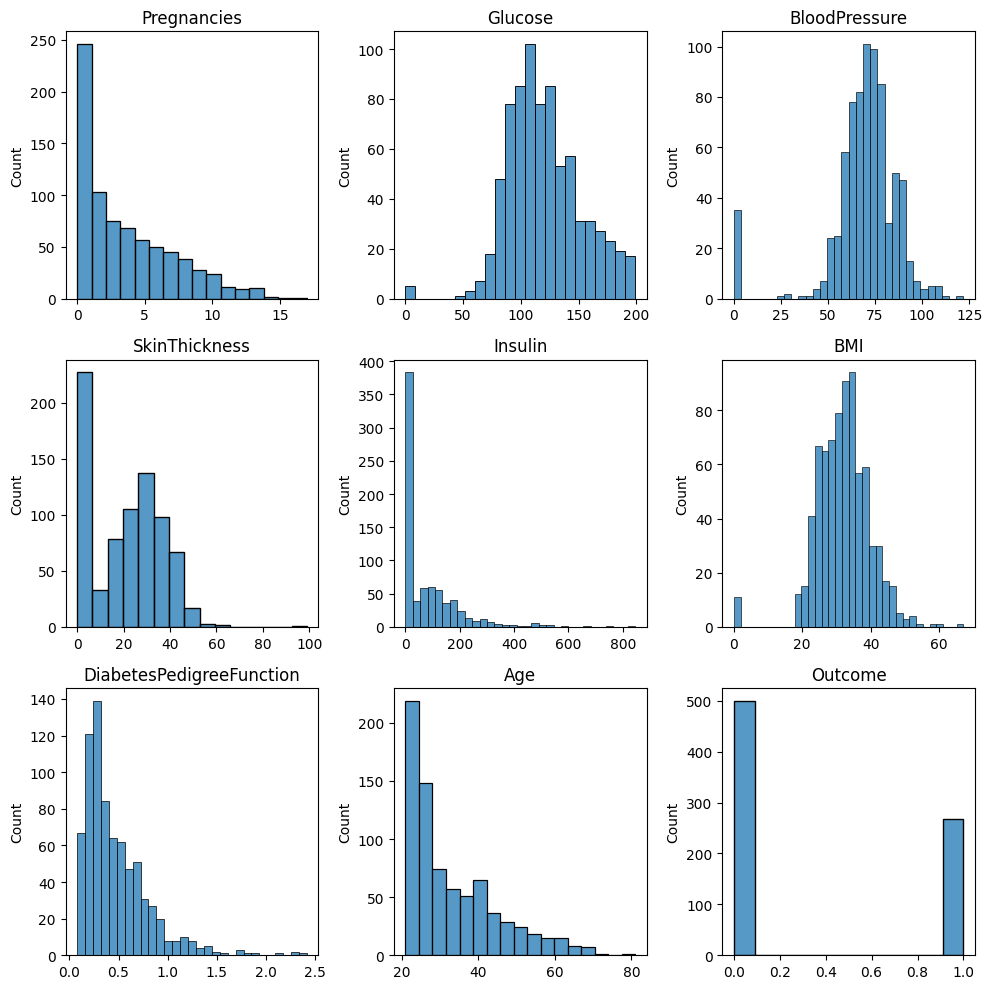

In [37]:
#Graficamos las variables más relevantes categóricas: job, marital, education, default, housing, loan
fig, axis = plt.subplots(3,3, figsize=(10,10))

sns.histplot(data=total_data["Pregnancies"], ax=axis[0,0]).set_xlabel("")
axis[0,0].set_title("Pregnancies")
sns.histplot(data=total_data["Glucose"], ax=axis[0,1]).set_xlabel("")
axis[0,1].set_title("Glucose")
sns.histplot(data=total_data["BloodPressure"], ax=axis[0,2]).set_xlabel("")
axis[0,2].set_title("BloodPressure")
sns.histplot(data=total_data["SkinThickness"], ax=axis[1,0]).set_xlabel("")
axis[1,0].set_title("SkinThickness")
sns.histplot(data=total_data["Insulin"], ax=axis[1,1]).set_xlabel("")
axis[1,1].set_title("Insulin")
sns.histplot(data=total_data["BMI"], ax=axis[1,2]).set_xlabel("")
axis[1,2].set_title("BMI")
sns.histplot(data=total_data["DiabetesPedigreeFunction"], ax=axis[2,0]).set_xlabel("")
axis[2,0].set_title("DiabetesPedigreeFunction")
sns.histplot(data=total_data["Age"], ax=axis[2,1]).set_xlabel("")
axis[2,1].set_title("Age")
sns.histplot(data=total_data["Outcome"], ax=axis[2,2]).set_xlabel("")
axis[2,2].set_title("Outcome")



plt.tight_layout()
plt.show()

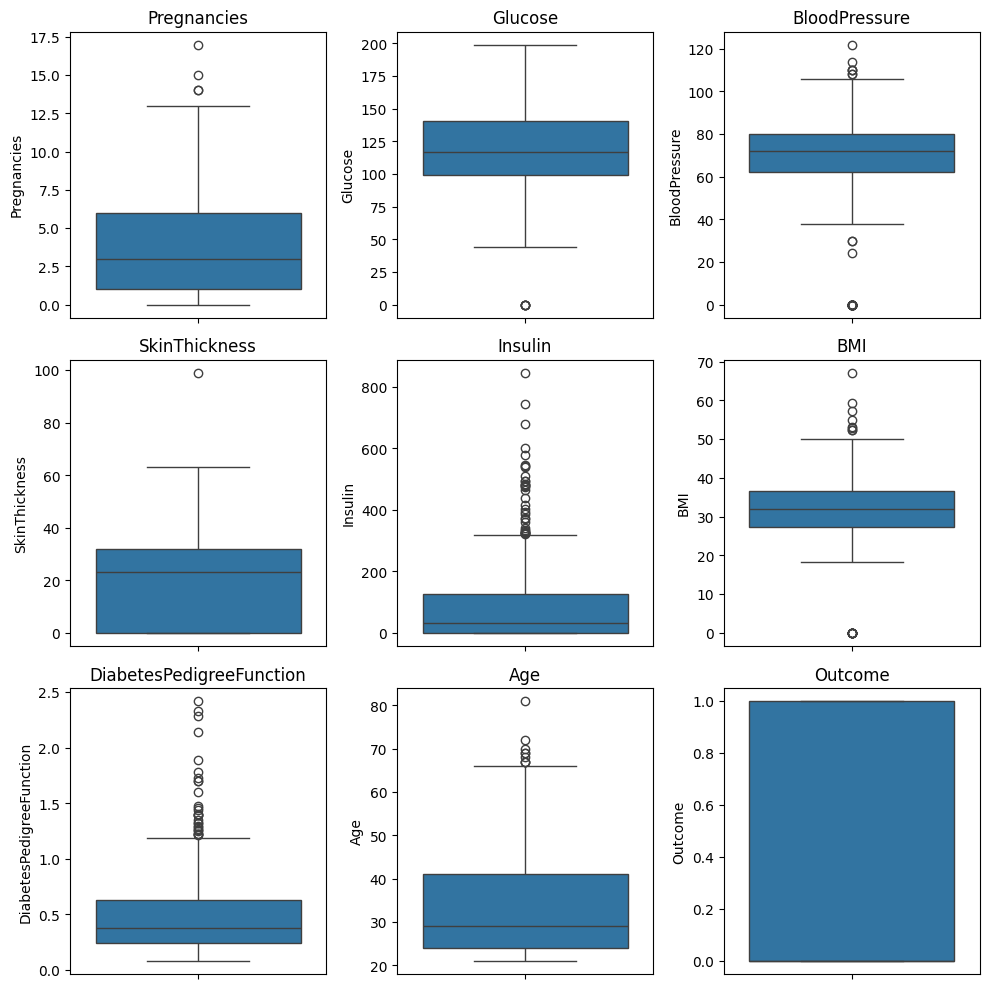

In [38]:
#Boxplot
fig, axis = plt.subplots(3,3, figsize=(10,10))

sns.boxplot(data=total_data["Pregnancies"], ax=axis[0,0]).set_xlabel("")
axis[0,0].set_title("Pregnancies")
sns.boxplot(data=total_data["Glucose"], ax=axis[0,1]).set_xlabel("")
axis[0,1].set_title("Glucose")
sns.boxplot(data=total_data["BloodPressure"], ax=axis[0,2]).set_xlabel("")
axis[0,2].set_title("BloodPressure")
sns.boxplot(data=total_data["SkinThickness"], ax=axis[1,0]).set_xlabel("")
axis[1,0].set_title("SkinThickness")
sns.boxplot(data=total_data["Insulin"], ax=axis[1,1]).set_xlabel("")
axis[1,1].set_title("Insulin")
sns.boxplot(data=total_data["BMI"], ax=axis[1,2]).set_xlabel("")
axis[1,2].set_title("BMI")
sns.boxplot(data=total_data["DiabetesPedigreeFunction"], ax=axis[2,0]).set_xlabel("")
axis[2,0].set_title("DiabetesPedigreeFunction")
sns.boxplot(data=total_data["Age"], ax=axis[2,1]).set_xlabel("")
axis[2,1].set_title("Age")
sns.boxplot(data=total_data["Outcome"], ax=axis[2,2]).set_xlabel("")
axis[2,2].set_title("Outcome")



plt.tight_layout()
plt.show()

In [39]:
#Eliminamos los valores 0 de las variables BMI, Glucose, Insulin, BloodPressure porque una persona no puede tener nivel 0 en cualquiera de estas tres variables

total_data = total_data[total_data["BMI"] != 0]
total_data = total_data[total_data["Glucose"] != 0]
total_data = total_data[total_data["BloodPressure"] != 0]
total_data = total_data[total_data["Insulin"] != 0]

#Elimino también el valor 100 de SkinThickness ya que es el único outlier que existe para esa variable y por lo tanto probablemtne sea un error

total_data = total_data[total_data["SkinThickness"]<=100]

In [40]:
#Vamos a detectar el rango intercuartilico de pedigree de diabetes

pedigree_stats = total_data["DiabetesPedigreeFunction"].describe()
pedigree_stats

count    392.000000
mean       0.523046
std        0.345488
min        0.085000
25%        0.269750
50%        0.449500
75%        0.687000
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [41]:
pediree_iqr = pedigree_stats["75%"] - pedigree_stats["25%"]
upper_limit_pedigree = pedigree_stats["75%"] + 1.5 * pediree_iqr
lower_limit_pedigree = pedigree_stats["25%"] - 1.5 * pediree_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit_pedigree, 2)} y {round(lower_limit_pedigree, 2)}, con un rango intercuartílico de {round(pediree_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 1.31 y -0.36, con un rango intercuartílico de 0.42


In [42]:
#Elimino los outliers de la variable

total_data = total_data[total_data["DiabetesPedigreeFunction"] <= 1.31]

He probado a eliminar más outliers y este ha sido el resultado más elevado que he podido encontrar en las métricas.

Vamos a comparar cada variable con la relación que tiene con el Outcome para decidir si podemos prescindir de alguna o no.

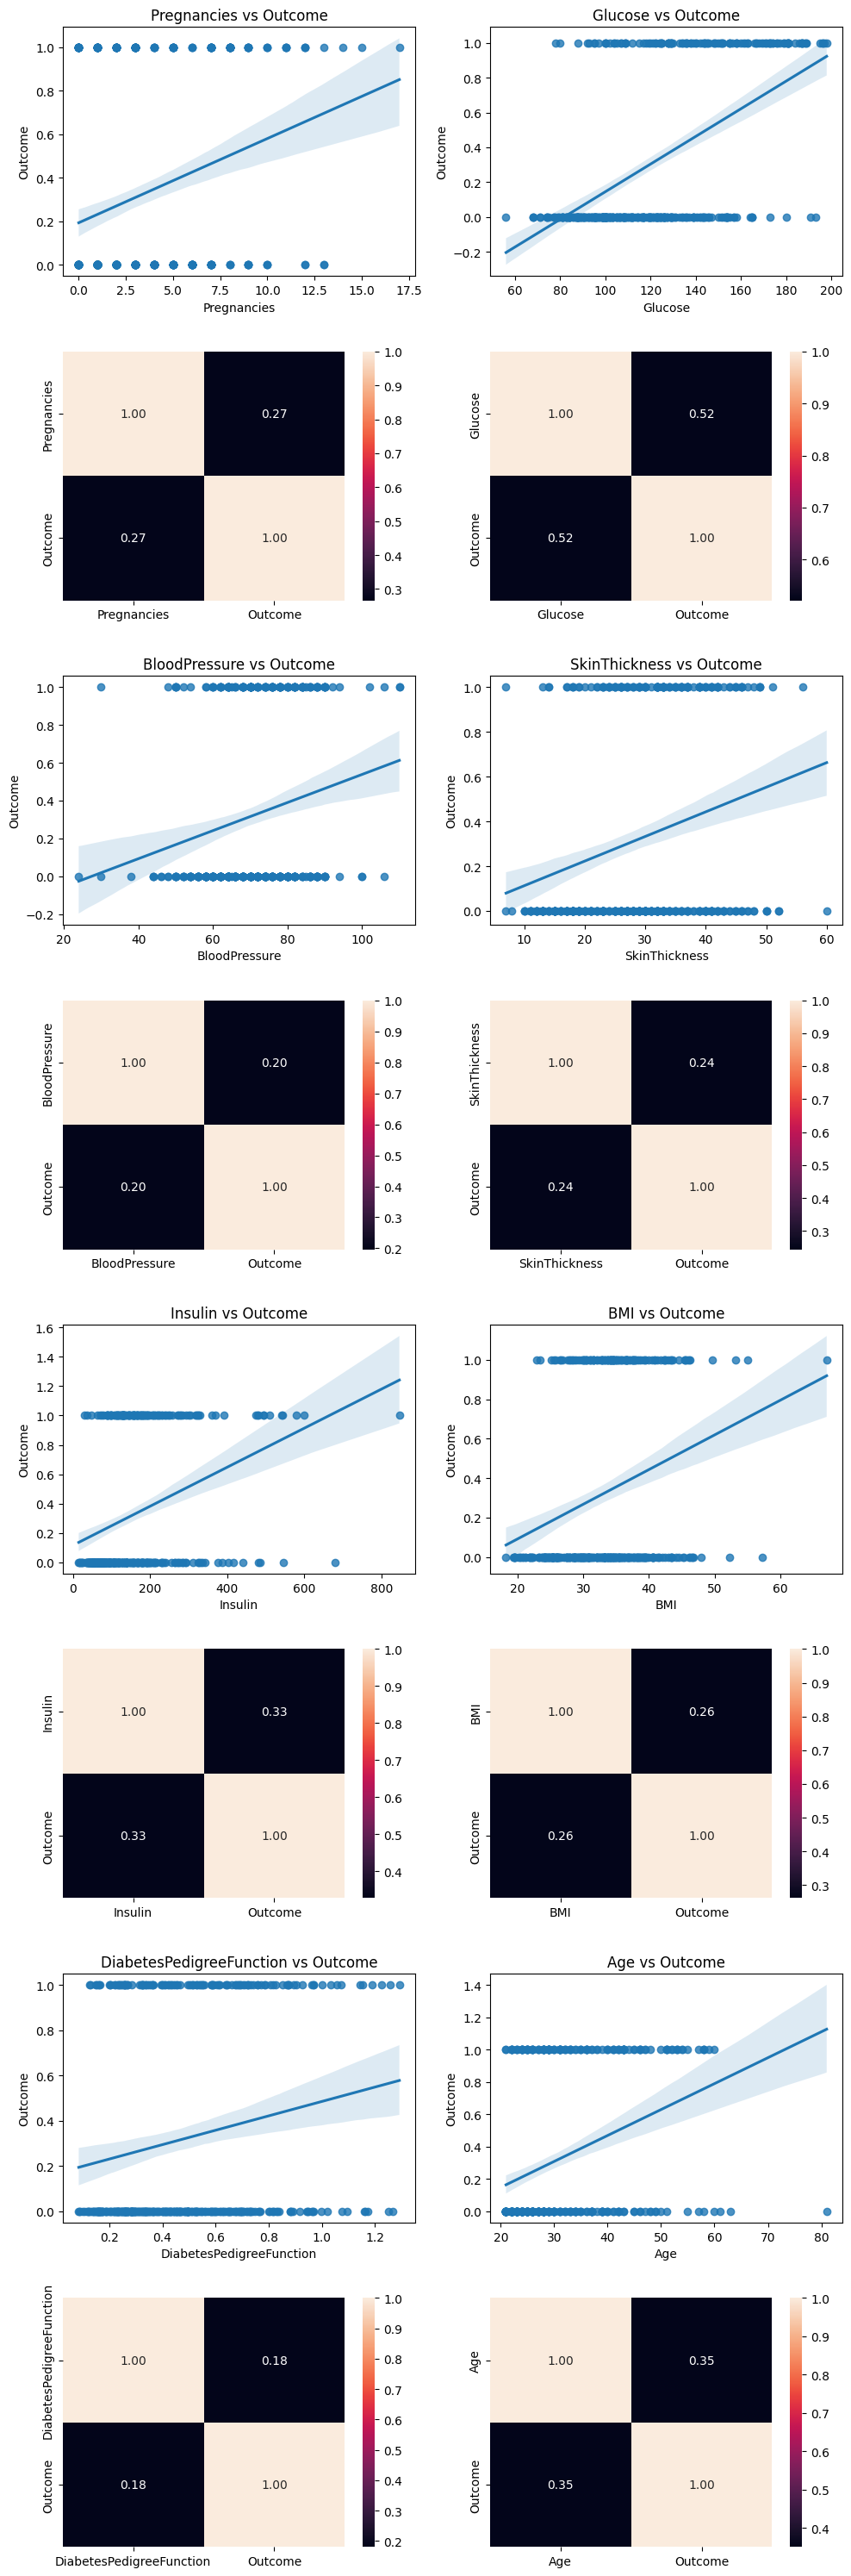

In [43]:
#Análisis numérico-numérico
fig, axis = plt.subplots(8,2, figsize=(10,30))

#Pregnancies
sns.regplot(ax= axis[0,0], data=total_data, x="Pregnancies", y="Outcome")
axis[0,0].set_title("Pregnancies vs Outcome")
sns.heatmap(total_data[["Pregnancies","Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[1,0])

#Glucose
sns.regplot(ax= axis[0,1], data=total_data, x="Glucose", y="Outcome")
axis[0,1].set_title("Glucose vs Outcome")
sns.heatmap(total_data[["Glucose","Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[1,1])

#BloodPressure
sns.regplot(ax= axis[2,0], data=total_data, x="BloodPressure", y="Outcome")
axis[2,0].set_title("BloodPressure vs Outcome")
sns.heatmap(total_data[["BloodPressure","Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[3,0])

#SkinThickness
sns.regplot(ax= axis[2,1], data=total_data, x="SkinThickness", y="Outcome")
axis[2,1].set_title("SkinThickness vs Outcome")
sns.heatmap(total_data[["SkinThickness","Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[3,1])

#Insulin
sns.regplot(ax= axis[4,0], data=total_data, x="Insulin", y="Outcome")
axis[4,0].set_title("Insulin vs Outcome")
sns.heatmap(total_data[["Insulin","Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[5,0])

#BMI
sns.regplot(ax= axis[4,1], data=total_data, x="BMI", y="Outcome")
axis[4,1].set_title("BMI vs Outcome")
sns.heatmap(total_data[["BMI","Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[5,1])

#DiabetesPedigreeFunction
sns.regplot(ax= axis[6,0], data=total_data, x="DiabetesPedigreeFunction", y="Outcome")
axis[6,0].set_title("DiabetesPedigreeFunction vs Outcome")
sns.heatmap(total_data[["DiabetesPedigreeFunction","Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[7,0])

#Age
sns.regplot(ax= axis[6,1], data=total_data, x="Age", y="Outcome")
axis[6,1].set_title("Age vs Outcome")
sns.heatmap(total_data[["Age","Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[7,1])

plt.tight_layout()
plt.show()

Podemos prescindir de las variables BloodPressure y DiabetesPedigreeFunction ya que tienen muy poca correlación con la variable objetivo

In [44]:
total_data.drop(["BloodPressure"], axis=1, inplace=True)
total_data.drop(["DiabetesPedigreeFunction"], axis=1, inplace=True)

total_data.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age,Outcome
3,1,89,23,94,28.1,21,0
6,3,78,32,88,31.0,26,1
8,2,197,45,543,30.5,53,1
13,1,189,23,846,30.1,59,1
14,5,166,19,175,25.8,51,1


Normalizamos los valores de las variables

In [45]:
from sklearn.model_selection import train_test_split

num_variables = ["Pregnancies", "Glucose", "Insulin", "BMI", "SkinThickness", "Age"]

X = total_data.drop(["Outcome"], axis=1)[num_variables]
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test.head()

,Pregnancies,Glucose,Insulin,BMI,SkinThickness,Age
541,3,128,190,32.4,25,27
532,1,86,65,41.3,52,29
540,8,100,215,39.4,40,43
95,6,144,228,33.9,27,40
85,2,110,125,32.4,29,27


In [46]:
#Escalado de las variables
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

scaler.fit(X_test)
X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

Árboles de decisión para clasificación

<Axes: >

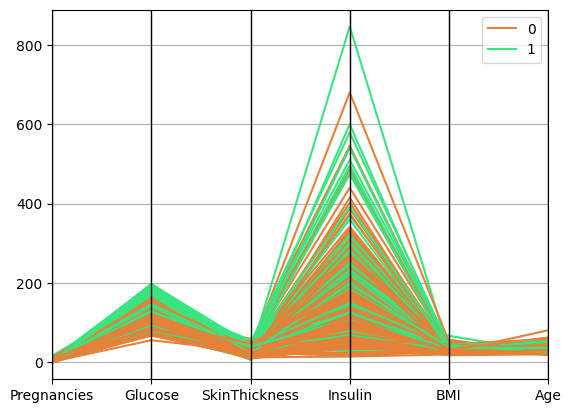

In [47]:
pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581"))

Inicialización y entrenamiento del modelo

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier(random_state = 42, min_samples_leaf=10, max_depth=4)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)

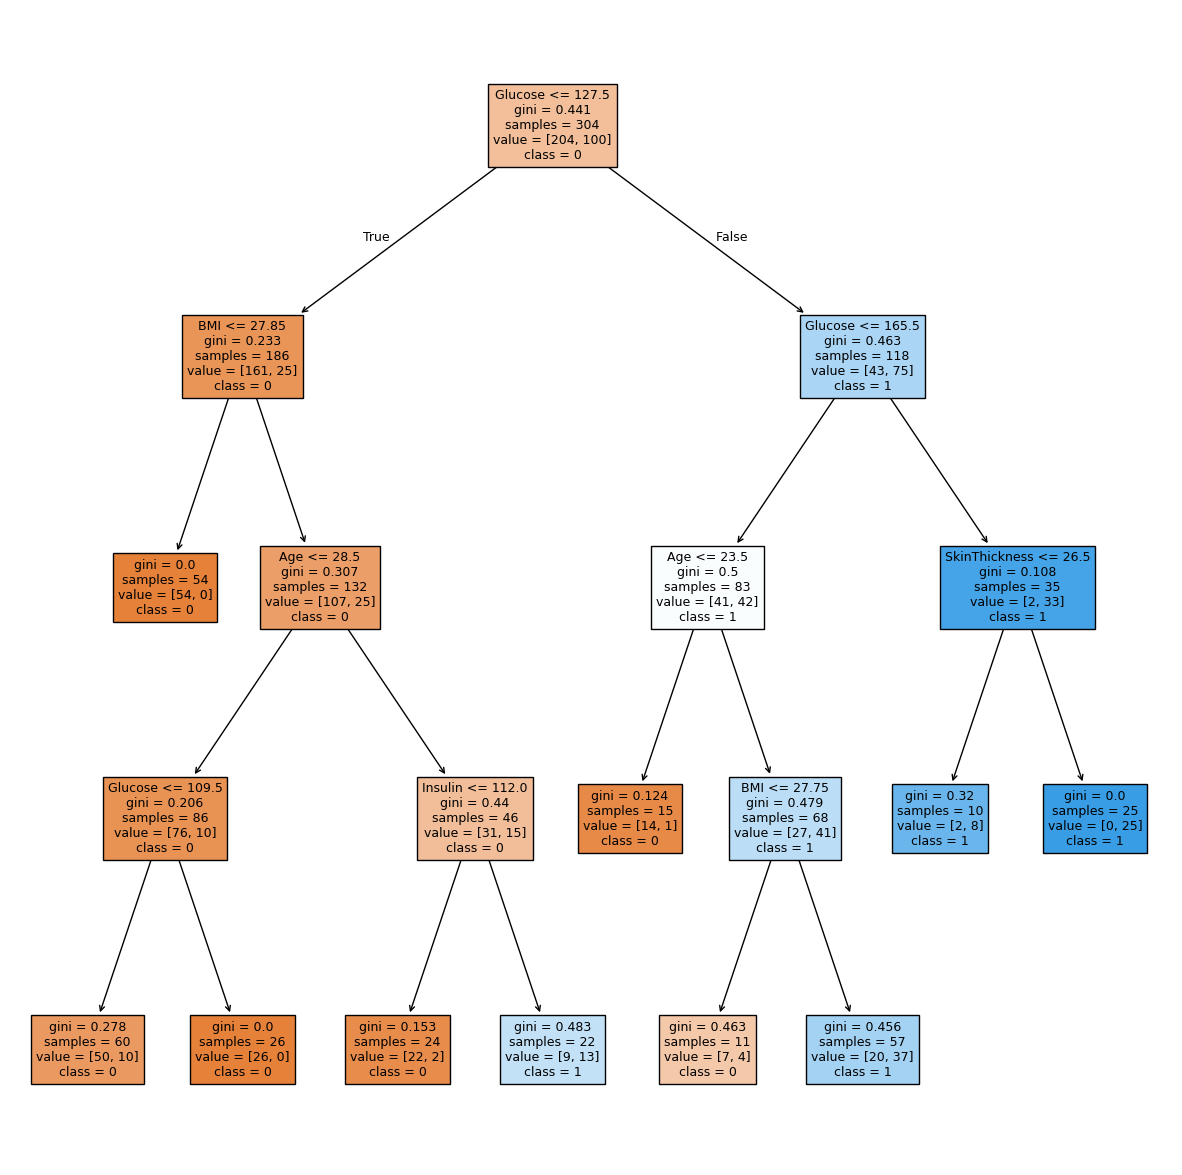

In [49]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names=list(X_train.columns), class_names=["0", "1"], filled=True)

plt.show()

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred_test = model.predict(X_test)
y_pred_test


array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [51]:
y_pred_train = model.predict(X_train)
y_pred_train

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,

El modelo tien buena precisión pero está lejos de ser perfecta

In [52]:
accuracy_score(y_test, y_pred_test)

0.7894736842105263

In [53]:
#Métricas

accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.7894736842105263
F1 score Test:  0.7894736842105263
Precision Test:  0.7894736842105263
Recall Test:  0.7894736842105263
Accuracy Train:  0.8421052631578947
F1 score Train:  0.8421052631578947
Precision Train:  0.8421052631578947
Recall Train:  0.8421052631578947


In [54]:
print(classification_report(y_test, y_pred_test, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        54
           1       0.60      0.82      0.69        22

    accuracy                           0.79        76
   macro avg       0.76      0.80      0.77        76
weighted avg       0.82      0.79      0.80        76



Vamos a desglosar esta tabla:

Precision: acierta un 91% de las veces en predecir que la observación es de clase 0 mientras que solo lo hace un 60% cuando es clase 1 (la predicción es baja para acertar clase 1)

Recall: el modelo detecta el 78% de los verdaderos 0 y un 82% de los verdaderos 1

F1-score: el rendimiento más flojo es para la clase 1 (un 84% comparado con un 69%)

Support: tiene una cantidad de 54 observaciones reales para la clase 0 y 22 observaciones reales para la clase 1

En conclusión, mi modelo funciona mejor prediciendo la clase 0 que la clase 1. Porque aunque detecta bien la clase 1 (recall=82%) falla bastante en predecirla (precision=78%). Predice la clase 1 de más de lo que es

In [55]:
#Métricas
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print("MSE Test: ", mse_test)
print("RMSE Test: ", rmse_test)

MSE Test:  0.21052631578947367
RMSE Test:  0.45883146774112354


RANDOM FOREST

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


model_2 = RandomForestClassifier(n_estimators=200, random_state=42, min_samples_leaf=2, max_depth=6, bootstrap=True, class_weight="balanced")

model_2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=2,
                       n_estimators=200, random_state=42)

In [57]:
y_pred_test_2 = model_2.predict(X_test)
y_pred_test_2

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [58]:
y_pred_train_2 = model_2.predict(X_train)
y_pred_train_2

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,

In [59]:
accuracy_score(y_test, y_pred_test_2)

0.7368421052631579

He probado a añadir varios vaslores para los hiperparámetros y el accuracy score no mejora. De hecho pasa de 0.78 a 0.73

In [60]:
from pickle import dump

dump(model, open("random_forest_classifier_default_42.sav", "wb"))

In [65]:
# modelos
ada = AdaBoostClassifier(n_estimators=300, learning_rate=0.1, random_state=42)
gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, random_state=42)
xgb = XGBClassifier(n_estimators=300, learning_rate=0.1, random_state = 42, use_label_encoder=False, eval_metric='mlogloss')
lgb = LGBMClassifier(n_estimators=300, learning_rate=0.1, random_state = 42)

# entrenamiento
ada.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 100, number of negative: 204
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 304, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328947 -> initscore=-0.712950
[LightGBM] [Info] Start training from score -0.712950
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:47:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


LGBMClassifier(n_estimators=300, random_state=42)

Predicciones

In [66]:
ada_y_pred_test = ada.predict(X_test)
gb_y_pred_test = gb.predict(X_test)
xgb_y_pred_test = xgb.predict(X_test)
lgb_y_pred_test = lgb.predict(X_test)

ada_y_pred_train = ada.predict(X_train)
gb_y_pred_train = gb.predict(X_train)
xgb_y_pred_train = xgb.predict(X_train)
lgb_y_pred_train = lgb.predict(X_train)

In [67]:
# metricas
ada_accuracy_test = accuracy_score(y_test, ada_y_pred_test)
ada_accuracy_train = accuracy_score(y_train, ada_y_pred_train)

gb_accuracy_test = accuracy_score(y_test, gb_y_pred_test)
gb_accuracy_train = accuracy_score(y_train, gb_y_pred_train)

xgb_accuracy_test = accuracy_score(y_test, xgb_y_pred_test)
xgb_accuracy_train = accuracy_score(y_train, xgb_y_pred_train)

lgb_accuracy_test = accuracy_score(y_test, lgb_y_pred_test)
lgb_accuracy_train = accuracy_score(y_train, lgb_y_pred_train)

print('AdaBoost')
print("Accuracy Test: ", ada_accuracy_test)
print("Accuracy Train: ", ada_accuracy_train)

print('Gradient Boosting')
print("Accuracy Test: ", gb_accuracy_test)
print("Accuracy Train: ", gb_accuracy_train)

print('XGBoost')
print("Accuracy Test: ", xgb_accuracy_test)
print("Accuracy Train: ", xgb_accuracy_train)

print('LightGBM')
print("Accuracy Test: ", lgb_accuracy_test)
print("Accuracy Train: ", lgb_accuracy_train)

AdaBoost
Accuracy Test:  0.7631578947368421
Accuracy Train:  0.8388157894736842
Gradient Boosting
Accuracy Test:  0.8026315789473685
Accuracy Train:  1.0
XGBoost
Accuracy Test:  0.7763157894736842
Accuracy Train:  1.0
LightGBM
Accuracy Test:  0.75
Accuracy Train:  1.0


Vemos con en este caso el test que mejores resultados da a la hora de realizar el Accuracy Test es el Gradient Boosting, que supera el Accuracy test de 0.78 del arbol de decisión original (Accuracy test del Gradient Boosting es de 0.80)

In [64]:
dump(model, open("random_forest_classifier_default_42.sav", "wb"))